# Creating a spending flag 

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Creating path for folder

In [3]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement4/Instacart Basket Analysis'

## Importing files

In [7]:
# Importing subset with only unique observations

In [5]:
instacart = pd.read_pickle(os.path.join (path, 'Data', 'Final Prepared Data','backup', 'IC_high_activity_2.pkl'))

In [7]:
instacart.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_day_of_week', 'order_time',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'max_order', 'max_order_per_user',
       'products_per_order', 'order_cost', 'Region', 'age_group',
       'loyalty_flag', 'mean_order_cost_per_user', 'spending_flag',
       'income_group', 'median_days_since_prior_order_per_user', 'freq_buyer'],
      dtype='object')

In [10]:
instacart.shape

(30963518, 32)

## 1. Creating new column: mean_order_cost

In [12]:
instacart['mean_order_cost_per_user'] = instacart.groupby(['user_id'])['order_cost'].transform(np.mean)

/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_41096/3620551806.py:1: FutureWarning: The provided callable <function mean at 0x122e40860> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  instacart['mean_order_cost_per_user'] = instacart.groupby(['user_id'])['order_cost'].transform(np.mean)


In [13]:
instacart.head(20)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,product_name,...,products_per_order,order_cost,Region,age_group,loyalty_flag,mean_order_cost_per_user,spending_flag,income_group,median_days_since_prior_order_per_user,freq_buyer
0,2,33120,1,1,202279,3,5,9,8,Organic Egg Whites,...,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer
1,2,28985,2,1,202279,3,5,9,8,Michigan Organic Kale,...,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer
2,2,9327,3,0,202279,3,5,9,8,Garlic Powder,...,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer
3,2,45918,4,1,202279,3,5,9,8,Coconut Butter,...,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer
4,2,30035,5,0,202279,3,5,9,8,Natural Sweetener,...,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer
5,2,17794,6,1,202279,3,5,9,8,Carrots,...,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer
6,2,40141,7,1,202279,3,5,9,8,Original Unflavored Gelatine Mix,...,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer
7,2,1819,8,1,202279,3,5,9,8,All Natural No Stir Creamy Almond Butter,...,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer
8,2,43668,9,0,202279,3,5,9,8,Classic Blend Cole Slaw,...,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer
9,3,33754,1,1,205970,16,5,17,12,Total 2% with Strawberry Lowfat Greek Strained...,...,8,70.3,West,mature,Regular customer,126.854489,high spender,Very High,8.0,non-frequent-buyer


## 2. Defining parameters for new flag

In [15]:
instacart['order_cost'].describe()

count    3.096352e+07
mean     1.222252e+02
std      7.534785e+01
min      0.000000e+00
25%      6.690000e+01
50%      1.077000e+02
75%      1.619000e+02
max      1.092200e+03
Name: order_cost, dtype: float64

In [16]:
# 25% of orders cost < 66.9
# 50% of orders cost < 107.7
# 75% of orders cost < 161.9
# max order cost was 1092.2

In [17]:
# 'low spender' for 'mean_ order_cost' <= 67
# 'regular spender' for 'mean_ order_cost' <=108 and >67
# 'high spender' for 'mean_ order_cost' <= 162 and >108 else
# 'very_high_spender' 

In [18]:
# flagging

spending_flag = [
    'low spender' if value <= 67 else
    'regular spender' if 67 < value <= 108 else
    'high spender' if 108 < value <= 162 else
    'very_high_spender'
    for value in instacart['mean_order_cost_per_user']
]

In [19]:
# Creating new column with the result

instacart['spending_flag'] = spending_flag

In [20]:
#checking procedure

instacart['spending_flag'].value_counts()

spending_flag
high spender         10329953
regular spender       9544666
very_high_spender     6519996
low spender           4568903
Name: count, dtype: int64

## 2. Creating a bar chart of customer distribution by "spending"

In [14]:
# Creating a subset withou duplicates

bar_spending = instacart[['spending_flag', 'user_id', 'Region']]

In [16]:
bar_spending.shape

(30963518, 3)

In [18]:
# Creating a subset withou duplicates

bar_spending_nodups = bar_spending.drop_duplicates()

In [20]:
bar_spending_nodups.shape

(162631, 3)

In [26]:
bar_spending_nodups.head()

,spending_flag,user_id
0,regular spender,202279
9,high spender,205970
17,high spender,178520
30,high spender,156122
56,high spender,22352


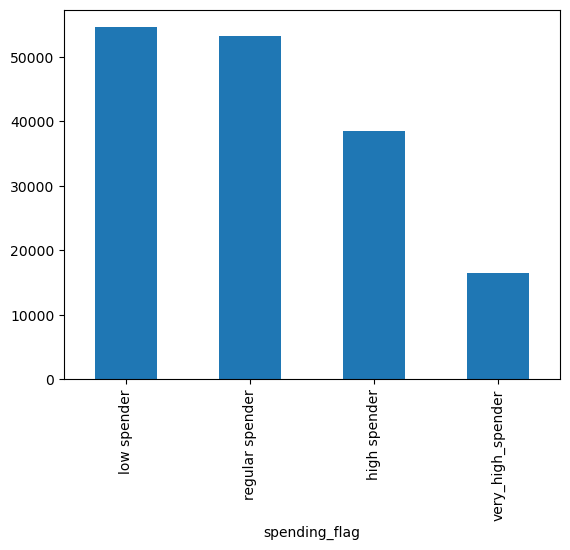

In [27]:
#Creating a bar chart

bar_spending = bar_spending_nodups['spending_flag'].value_counts().plot.bar()

In [28]:
# exporting plot

bar_spending.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'bar_spending.png'))

## 3. Creating variable 'price_range'

### 3.1 Defining price_range

In [ ]:
#price_range

#'high-range product' for ‘prices’ >15
#‘mid-range product' for ‘prices’ >5 & <=15
#‘low-range product' for ‘prices’ <=5

In [68]:
# flagging

price_range = [
    'low-range product' if value <= 5 else
    'mid-range product' if 5 < value <= 15 else
    'high-range product'
    for value in instacart['prices']
]

### 3.2 Adding new column to instacart as 'price_range'

In [71]:
instacart['price_range'] = price_range

In [75]:
instacart['price_range'].value_counts()

price_range
mid-range product     20891240
low-range product      9674325
high-range product      397953
Name: count, dtype: int64

In [77]:
instacart.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,product_name,...,order_cost,Region,age_group,loyalty_flag,mean_order_cost_per_user,spending_flag,income_group,median_days_since_prior_order_per_user,freq_buyer,price_range
0,2,33120,1,1,202279,3,5,9,8,Organic Egg Whites,...,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer,mid-range product
1,2,28985,2,1,202279,3,5,9,8,Michigan Organic Kale,...,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer,mid-range product
2,2,9327,3,0,202279,3,5,9,8,Garlic Powder,...,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer,low-range product
3,2,45918,4,1,202279,3,5,9,8,Coconut Butter,...,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer,mid-range product
4,2,30035,5,0,202279,3,5,9,8,Natural Sweetener,...,91.6,West,mature,New customer,100.342222,regular spender,High,24.0,non-frequent-buyer,mid-range product


## 4. Creating a bar chart for price_range

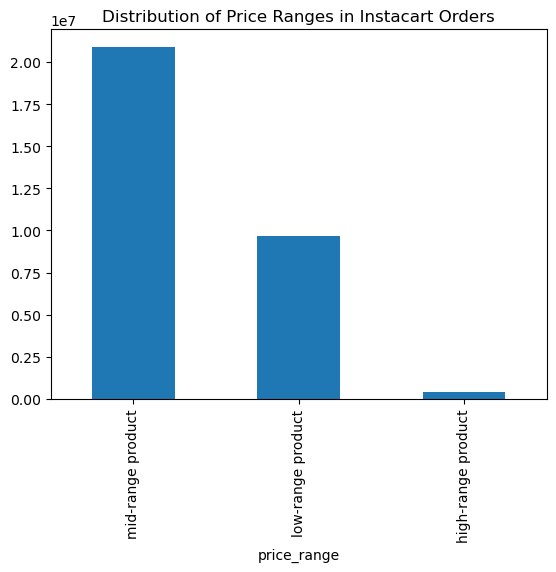

In [89]:
bar_price_range = instacart['price_range'].value_counts().plot.bar(title="Distribution of Price Ranges in Instacart Orders")

## 5. Creating a stacked bar chart showing price range per spending flag

Text(0.5, 1.0, 'Distribution of Price Ranges by Spending Flag')

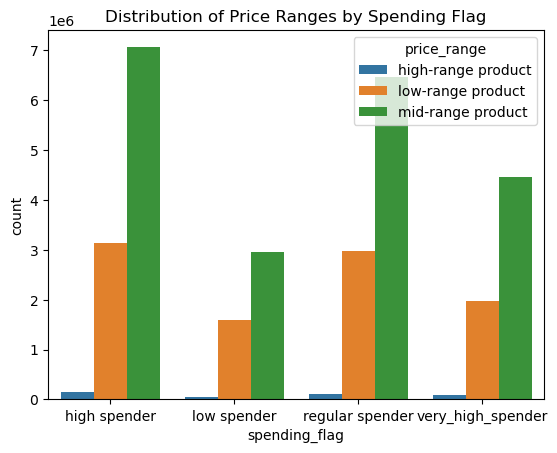

In [96]:
# Stacked bar chart

sns.barplot(x='spending_flag', y='count', hue='price_range', data=instacart.groupby(['price_range', 'spending_flag']).size().reset_index(name='count'))
plt.title("Distribution of Price Ranges by Spending Flag")

## 6. Creating a stacked bar chart showing spending flag by Region

Text(0.5, 1.0, 'Customer Spending Status by Region')

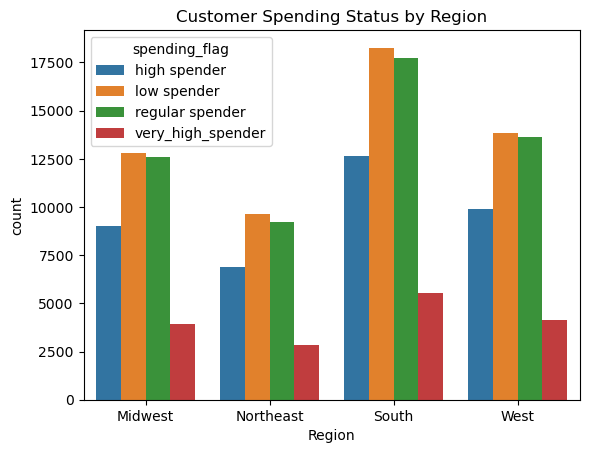

In [22]:
# Stacked bar chart

sns.barplot(x='Region', y='count', hue='spending_flag', data=bar_spending_nodups.groupby(['Region', 'spending_flag']).size().reset_index(name='count'))
plt.title("Customer Spending Status by Region")

## 7. Exporting 

In [30]:
instacart.to_pickle(os.path.join(path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [31]:
instacart.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_day_of_week', 'order_time',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'max_order', 'max_order_per_user',
       'products_per_order', 'order_cost', 'Region', 'age_group',
       'loyalty_flag', 'mean_order_cost_per_user', 'spending_flag',
       'income_group', 'median_days_since_prior_order_per_user', 'freq_buyer'],
      dtype='object')